In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('all_data.csv')

In [15]:
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [16]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [3]:
countries = list(set(df['Country']))
countries

['Mexico', 'Zimbabwe', 'China', 'Germany', 'Chile', 'United States of America']

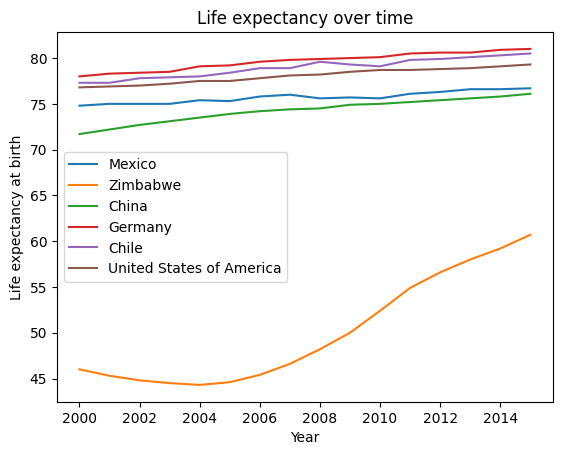

In [4]:
# Analysing life expectancy over time in different countries

def compare_life_expectancy_over_time_of_countries(countries):
    for country in countries:
        temp = df[df.Country == country]
        plt.plot(temp.Year, temp['Life expectancy at birth (years)'])
        plt.xlabel('Year')
        plt.ylabel('Life expectancy at birth')
    plt.legend(countries)
    plt.title('Life expectancy over time')
    plt.show()

# all countries from data
compare_life_expectancy_over_time_of_countries(countries)

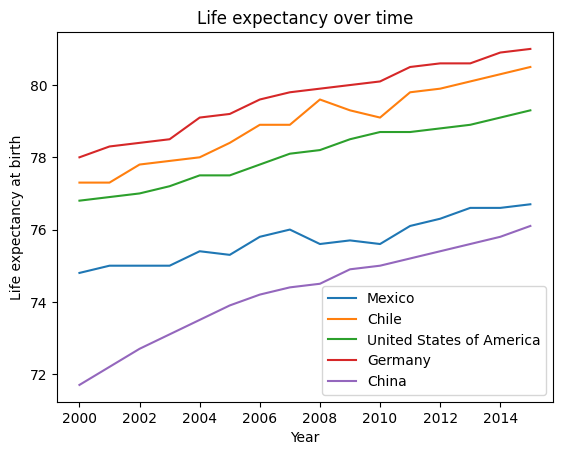

In [5]:
countries_without_zimbabwe = ['Mexico', 'Chile', 'United States of America', 'Germany', 'China']
compare_life_expectancy_over_time_of_countries(countries_without_zimbabwe)

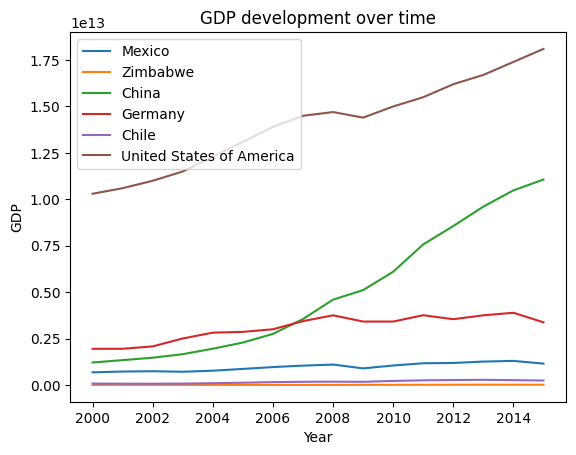

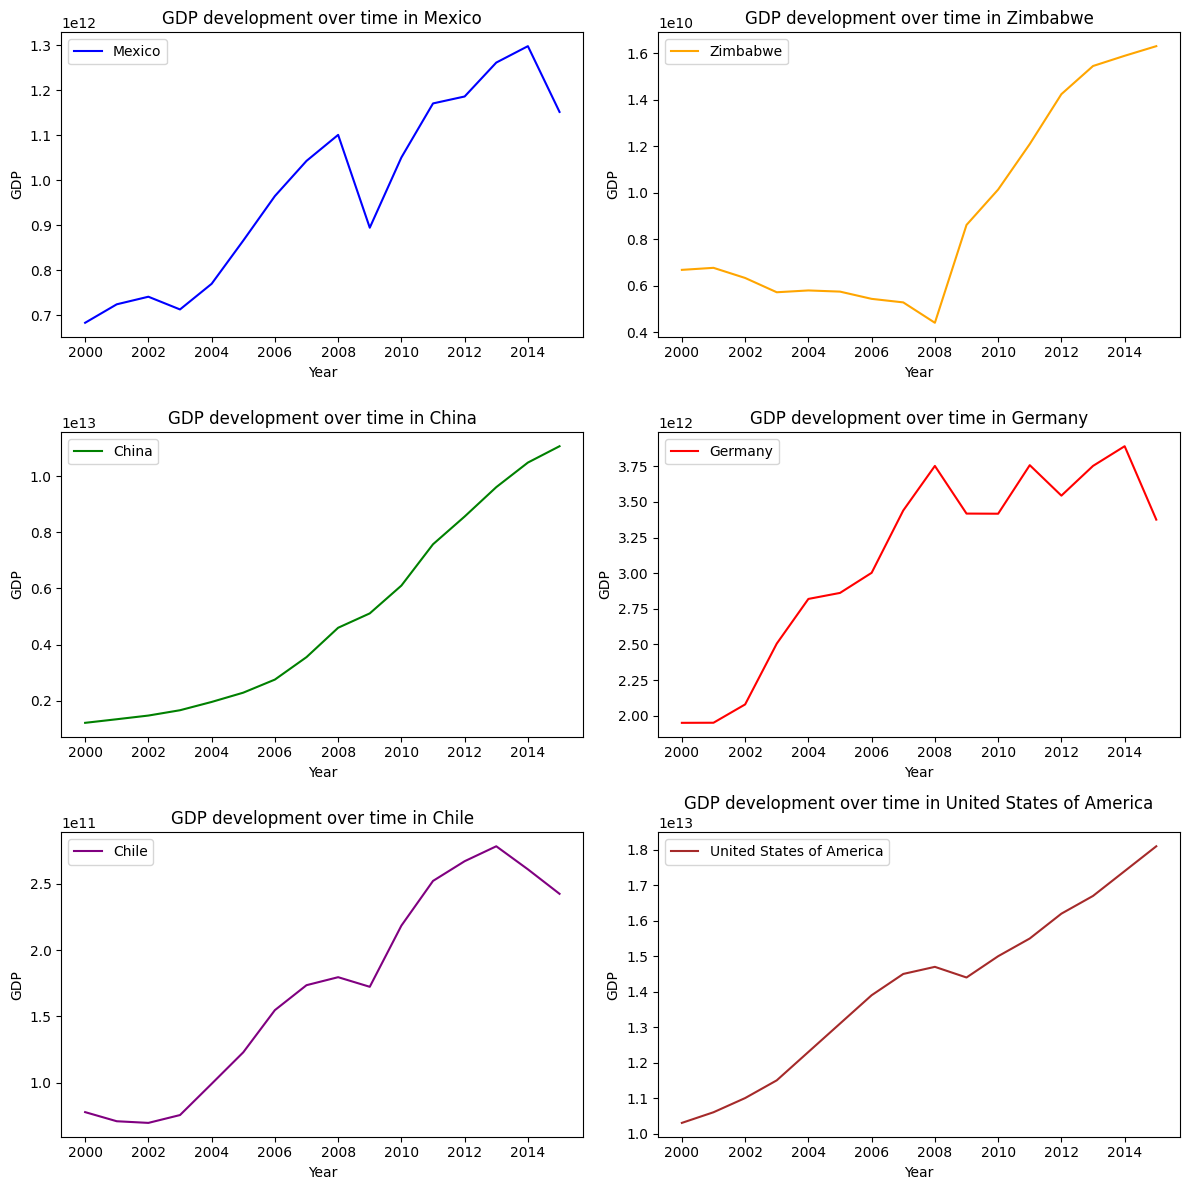

In [11]:
# GDP development over time

def compare_gdp_over_time_of_countries(countries):
    for country in countries:
        temp = df[df.Country == country]
        plt.plot(temp.Year, temp['GDP'])
        plt.xlabel('Year')
        plt.ylabel('GDP')
    plt.legend(countries)
    plt.title('GDP development over time')
    plt.show()

compare_gdp_over_time_of_countries(countries)

def show_gdp_for_each_country(countries):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
    for idx, country in enumerate(countries):
        temp = df[df.Country == country]
        row = idx // 2
        col = idx % 2
        ax[row, col].plot(temp.Year, temp['GDP'], label=country, color=colors[idx])
        ax[row, col].set_xlabel('Year')
        ax[row, col].set_ylabel('GDP')
        ax[row, col].set_title(f'GDP development over time in {country}')
        ax[row, col].legend()
    plt.tight_layout()
    plt.show()

show_gdp_for_each_country(countries)

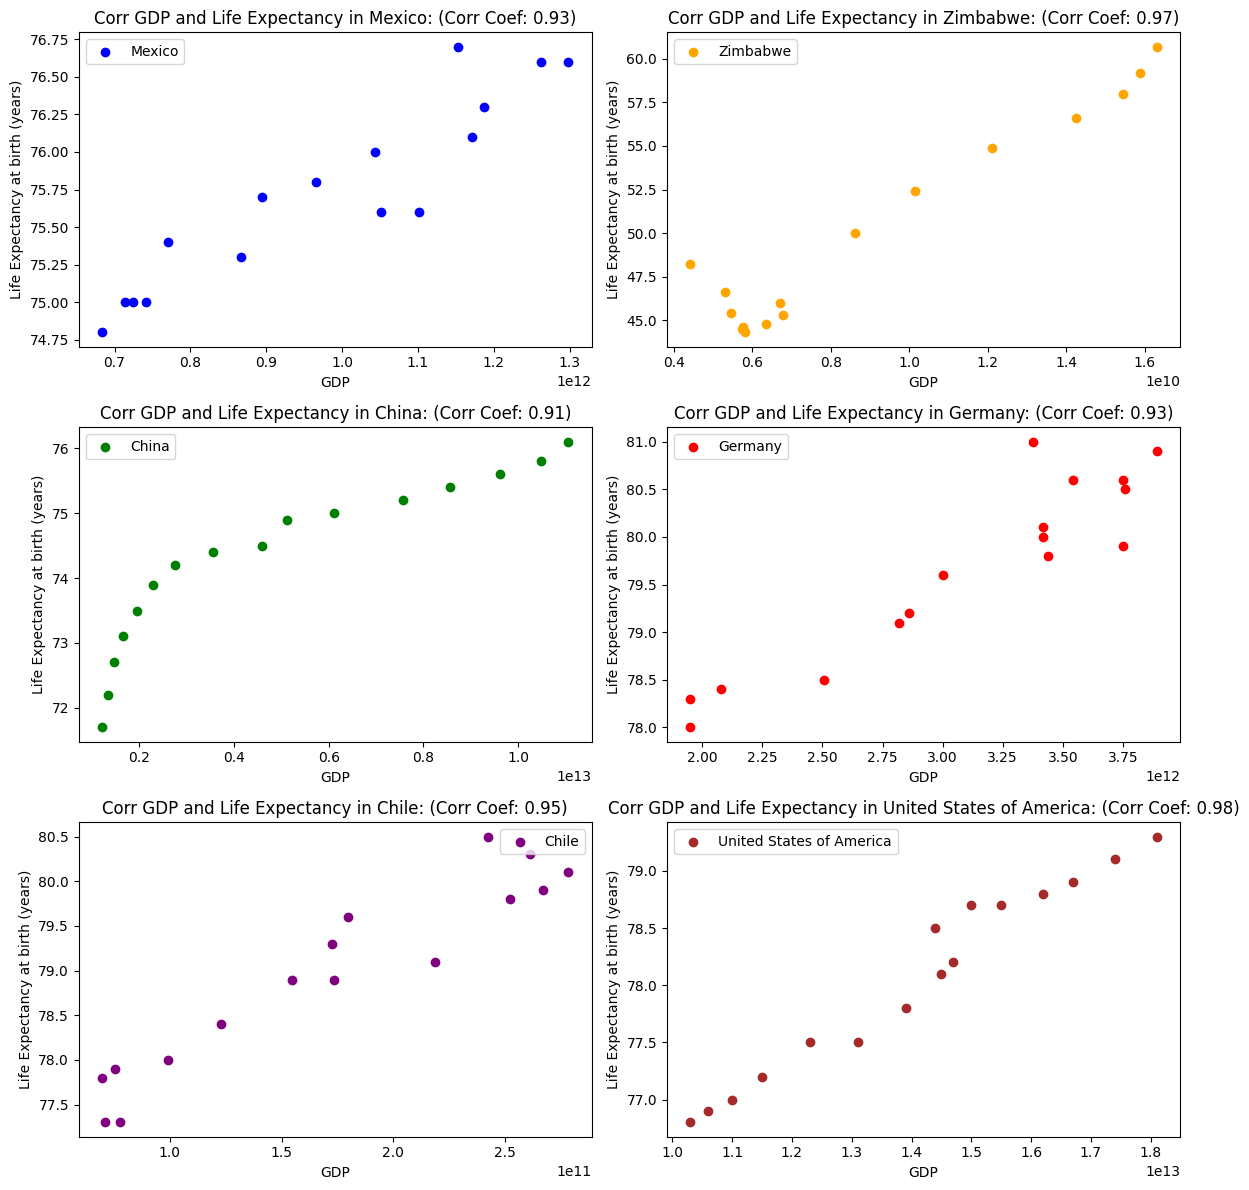

In [10]:
# See if there's a correlation between GDP and life expectancy

def find_correlation_between_gdp_and_life_expectancy(countries):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown'] # Add more colors if needed
    for idx, country in enumerate(countries):
        temp = df[df.Country == country]
        corr_coef = np.corrcoef(temp['GDP'], temp['Life expectancy at birth (years)'])
        row = idx // 2
        col = idx % 2
        ax[row, col].scatter(temp['GDP'], temp['Life expectancy at birth (years)'], label=country, color=colors[idx])
        ax[row, col].set_xlabel('GDP')
        ax[row, col].set_ylabel('Life Expectancy at birth (years)')
        ax[row, col].set_title(f'Corr GDP and Life Expectancy in {country}: (Corr Coef: {round(corr_coef[0][1], 2)})')
        ax[row, col].legend()
    plt.tight_layout()
    plt.show()


find_correlation_between_gdp_and_life_expectancy(countries)